In [ ]:
#Imports
import numpy as np
import pandas as pd
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score,recall_score,f1_score

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error


In [2]:
#I chose a linear regression model because the target variable (“High”) is continuous. 
# The goal is to estimate a numeric value based on historical features like Open, Low, Close, and Volume. 
# Linear regression is simple, interpretable, and suitable for identifying linear relationships in financial data.

In [3]:
#Reads the csv files and get info abouts columns and datatypes
df = pd.read_csv('btcusd_1-min_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242877 entries, 0 to 7242876
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 331.6 MB


In [4]:

df = df.dropna()

features = ['Open', 'Low', 'Close', 'Volume']
target = 'High'

df = df[features + [target]]


In [5]:
#Checking for null values
df.dropna(inplace=True)
df.isna().sum()

Open      0
Low       0
Close     0
Volume    0
High      0
dtype: int64

In [6]:
#Dropping duplicates and checking shape of DF
df.drop_duplicates(inplace=True)                     
df.shape


(6046538, 5)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.3, random_state=42)

In [8]:
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

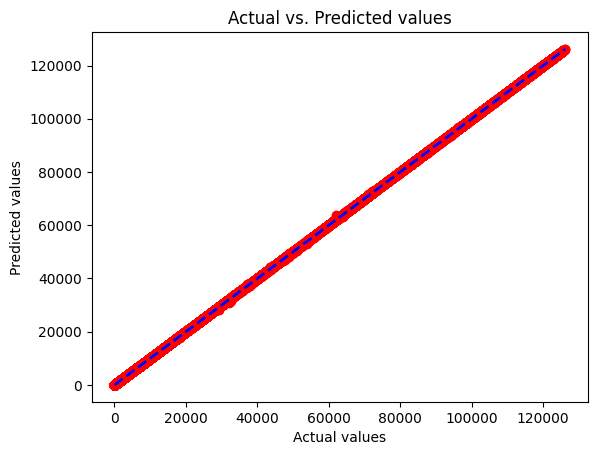

In [9]:
plt.scatter(y_test,predictions, color='red')
plt.plot([min(y_test), max(y_test)],[min(y_test),max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

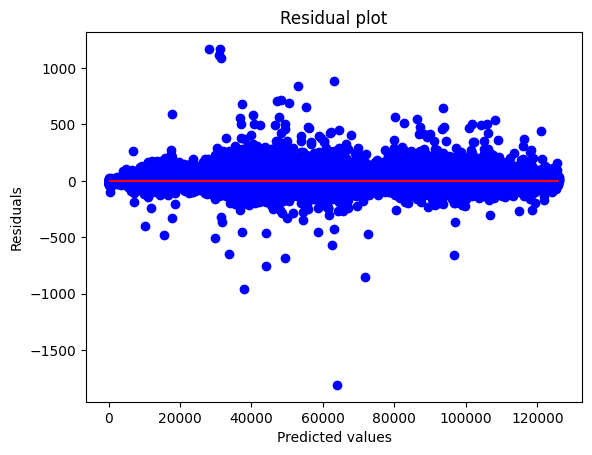

In [10]:
y_prediction = model.predict(x_test)
residuals = y_test - y_prediction

plt.scatter(y_prediction, residuals, color='blue')
plt.hlines(y=0, xmin=0, xmax=max(y_prediction), color='red')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


In [13]:
r2 = r2_score(y_test,predictions)
mae = mean_absolute_percentage_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
accuracy_score = accuracy_score(y_test,predictions)



print(f"R² score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"accuracy_score: {accuracy_score:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [1813959, 1813962]

Accuracy: 0.5365209467248158
Confusion Matrix:
 [[973227      0]
 [840732      0]]


C:\Users\arons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\arons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       0.54      1.00      0.70    973227
           1       0.00      0.00      0.00    840732

    accuracy                           0.54   1813959
   macro avg       0.27      0.50      0.35   1813959
weighted avg       0.29      0.54      0.37   1813959



C:\Users\arons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


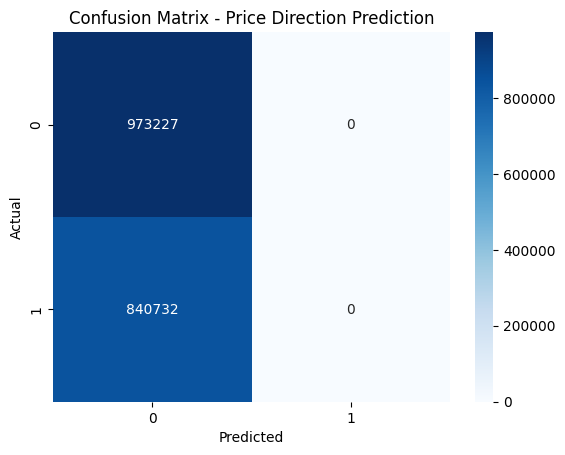

In [12]:
df['Return'] = df['Close'].pct_change()
df['Future_Return'] = df['Return'].shift(-10)
df = df.dropna()

# Lag klasser
df['Direction'] = (df['Future_Return'] > 0).astype(int)

features = ['Return', 'Volume']
target = 'Direction'

split = int(len(df) * 0.7)
x_train = df[features].iloc[:split]
y_train = df[target].iloc[:split]
x_test = df[features].iloc[split:]
y_test = df[target].iloc[split:]

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Price Direction Prediction')
plt.show()